## Imports

In [1]:
import os
import subprocess


#find CUDA directories
def find_file(name, start="/usr"):
    try:
        result = subprocess.run(
            ["find", start, "-name", name],
            stdout=subprocess.PIPE,
            stderr=subprocess.DEVNULL,
            text=True,
        )
        paths = result.stdout.strip().split("\n")
        return paths[0] if paths and paths[0] else None
    except Exception as e:
        return None

cuda_header = find_file("cuda_runtime.h")
cuda_lib = find_file("libcudart.so")

if cuda_header and cuda_lib:
    include_dir = os.path.dirname(cuda_header)
    lib_dir = os.path.dirname(cuda_lib)

    print("CUDA paths found :)")
    print("Include:", include_dir)
    print("Library:", lib_dir)
else:
    raise RuntimeError(" CUDA headers or libraries not found. Make sure CUDA is installed via apt.")

CUDA paths found :)
Include: /usr/include
Library: /usr/lib/x86_64-linux-gnu


In [2]:
import sys
import ctypes
import os
import git

# run the following commands in your terminal before starting the tutorial
"""
sudo apt update
sudo apt install -y \
  nvidia-cuda-toolkit \
  openmpi-bin \
  libopenmpi-dev \
  libomp-dev \
  python3-all-dev \
  python3-numpy \
  python3-scipy \
  python3-matplotlib \
  python3-mpi4py
"""
# Clone the NEST GPU repository
!git clone https://github.com/nest/nest-gpu.git

# Create a build directory
!mkdir -p nest-gpu/nest-gpu-build

# Create an install directory
!mkdir -p  nest-gpu-install

# Change to the build directory
%cd nest-gpu/nest-gpu-build

# Set install and source directories, nestgpu_install_dir should be an absolute path!
nestgpu_src_dir = ".."
nestgpu_install_dir = "../../nest-gpu-install"
absolute_path = os.path.abspath(nestgpu_install_dir)

# Configure the project with CMake
# force gcc9 to avoid gcc and CUDA conflicts
!cmake \
  -DCMAKE_C_COMPILER=/usr/bin/gcc-9 \
  -DCMAKE_CXX_COMPILER=/usr/bin/g++-9 \
  -DCMAKE_INSTALL_PREFIX:PATH="{absolute_path}" \
  -DCUDAToolkit_INCLUDE_DIR="{include_dir}" \
  -DCUDAToolkit_LIBRARY="{cuda_lib}" \
  {nestgpu_src_dir}


Clone in 'nest-gpu' in corso...
remote: Enumerating objects: 7509, done.
remote: Counting objects: 100% (1604/1604), done.
remote: Compressing objects: 100% (258/258), done.
remote: Total 7509 (delta 1445), reused 1346 (delta 1346), pack-reused 5905 (from 2)
Ricezione degli oggetti: 100% (7509/7509), 29.82 MiB | 2.33 MiB/s, fatto.
Risoluzione dei delta: 100% (5844/5844), fatto.
/home/luca/Scrivania/notebook.ipynb/nest-gpu/nest-gpu/nest-gpu-build


/home/luca/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


-- The CUDA compiler identification is NVIDIA 11.5.119
-- The CXX compiler identification is GNU 9.5.0
-- The C compiler identification is GNU 9.5.0
-- Detecting CUDA compiler ABI info
-- Detecting CUDA compiler ABI info - done
-- Check for working CUDA compiler: /bin/nvcc - skipped
-- Detecting CUDA compile features
-- Detecting CUDA compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/g++-9 - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/gcc-9 - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Looking for include file dlfcn.h
-- Looking for include file dlfcn.h - found
-- Looking for include file inttypes.h
-- Looking for include file inttypes.h - found
-- Looking for include file limits.h
-- Looking for include

In [3]:
!make 
!make install

[  1%] Building CUDA object src/CMakeFiles/nestgpukernel.dir/aeif_cond_alpha.cu.o
[  3%] Building CUDA object src/CMakeFiles/nestgpukernel.dir/aeif_cond_alpha_multisynapse.cu.o
[  5%] Building CUDA object src/CMakeFiles/nestgpukernel.dir/aeif_cond_beta.cu.o
[  7%] Building CUDA object src/CMakeFiles/nestgpukernel.dir/aeif_cond_beta_multisynapse.cu.o
[  9%] Building CUDA object src/CMakeFiles/nestgpukernel.dir/aeif_psc_alpha.cu.o
[ 11%] Building CUDA object src/CMakeFiles/nestgpukernel.dir/aeif_psc_alpha_multisynapse.cu.o
[ 13%] Building CUDA object src/CMakeFiles/nestgpukernel.dir/aeif_psc_delta.cu.o
[ 15%] Building CUDA object src/CMakeFiles/nestgpukernel.dir/aeif_psc_exp.cu.o
[ 17%] Building CUDA object src/CMakeFiles/nestgpukernel.dir/aeif_psc_exp_multisynapse.cu.o
[ 19%] Building CUDA object src/CMakeFiles/nestgpukernel.dir/base_neuron.cu.o
[ 21%] Building CUDA object src/CMakeFiles/nestgpukernel.dir/connect.cu.o
[ 23%] Building CUDA object src/CMakeFiles/nestgpukernel.dir/connect_

In [4]:
import sys

python_pkg_path = os.path.join(absolute_path, "lib", "python3.10", "site-packages")
if python_pkg_path not in sys.path:
    sys.path.append(python_pkg_path)


lib_path = os.path.join(absolute_path, "lib", "nestgpu", "libnestgpukernel.so")

if not os.path.exists(lib_path):
    raise FileNotFoundError(f"Libreria .so non trovata in: {lib_path}")

os.environ["NESTGPU_LIB"] = lib_path

import nestgpu as ngpu
ngpu.SetVerbosityLevel(0)


              -- NEST GPU --

  Copyright (C) 2021 The NEST Initiative

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Homepage: https://github.com/nest/nest-gpu



0

## The Brunel Network
  <img src="figures/brunel_network.png" alt="Brunel network" width="300">

A **Brunel network** is a widely used benchmark model in computational neuroscience introduced by [Nicolas Brunel (2000)](https://link.springer.com/article/10.1023/A:1008925309027).

The network consists of:
- **Two neuronal populations**: one excitatory and one inhibitory, both consisting of adaptive exponential integrate-and-fire (AdEx) neurons (IAF in the original model).
- **Sparse, random connectivity** between neurons.

To ensure realistic network dynamics, a proper balance between excitation and inhibition is essential. This includes both the ratio of excitatory to inhibitory neurons and the number of excitatory and inhibitory synapses, both set to 4:1.

Based on the network size (denoted as `order`), the number of neurons is:

- $N_E$ : $4 \times \text{order}$ (excitatory neurons)  
- $N_I$ : $1 \times \text{order}$ (inhibitory neurons)

Each neuron receives **C** randomly chosen connections from other neurons in the network, composed of:

- $C_E \leq N_E$: synapses from **excitatory neurons**
- $C_I \leq N_I$: synapses from **inhibitory neurons**

Since this is a sparsely connected network, the number of synapses is significantly smaller than the total number of neurons.

Let's start by defining this parameters of the network! 




In [5]:
order = 1000

NE = 4 * order       # number of excitatory neurons
NI = 1 * order       # number of inhibitory neurons
n_neurons = NE + NI  # number of neurons in total

CE = 800   # number of excitatory synapses per neuron
CI = CE//4  # number of inhibitory synapses per neuron

## Create the network: neurons and devices

Now that we have a clear understanding of the network parameters and have declared them, we can proceed to create the network using NEST GPU commands.

A neural network in NEST GPU consists of two basic element types: **nodes** and **connections**.
Nodes can be either **neurons**, **devices**, or **sub-networks**.  
Devices are used to **stimulate neurons** or to **record** from them.

New nodes are created using the `Create()` command, which takes as arguments:
- **model name** of the desired node type
- **number of nodes** to be created
- **number of synapse types** per node

The only mandatory parameter is the model, the number of nodes to create and the number synapse types are set to one by default. To take into account of the two possibile synapses, excitatory and inhibitory, we have to declare $n_\text{receptors} =2 $ (models with more synapse types are called multisynapses models). The differences between excitatory and inhibitory synapses lie in their reversal potentials and synaptic weights. For excitatory synapses, the reversal potential is  $E_{\text{rev,ex}}=0$ mV  and the synaptic weight is $W_{\text{ex}}=0.05$ mV. For inhibitory, the reversal potential is $E_{\text{rev,IN}}=-85$ mV and the synaptic weight is $W_{\text{in}}=0.35$ mV.

To adjust parameters of a device/neuron we use the ngpu function `SetStatus(node_name,"node_feature", feature_value)`. 

Once that we have decided the number of synaptic ports per neuron (`n_receptors`), we have to define the respective parameters of the excitatory and inhibitory synapses (i.e. the decay time constants and weights). The synaptic current $ I_{\text{syn}}(t) $ deriving from an arriving input spike is :

$I_{\text{syn}}(t) = g_{\text{syn}}(t) \cdot (V(t) - E_{\text{rev}}) $

where:
- $V(t)$ is the neuron membrane potential 
- $E_{\text{rev}}$ is the reversial potential
- $g_{\text{syn}}$ is the synapse conductance

The synaptic conductance is given by the following equation:

$ g_{\text{syn}} = W_{\text{ex/in}} \cdot \left( 1- e^{-(t - t_{\text{spike}})/\tau_{\text{rise}}}\right ) \cdot e^{-(t - t_{\text{spike}})/\tau_{\text{decay}}}  \cdot H(t - t_{\text{spike}})$

where:
- $ W_{\text{ex/in}} $ is the synaptic weight of the synapse
- $ t_{\text{spike}} $ is the time of the presynaptic spike
- $ \tau_{\text{rise}} $ is the rise time constant
- $ \tau_{\text{decay}} $ is the decay time constant
- $ H(t) $ is the Heaviside function, which ensures that the synaptic current becomes non-zero only after the arrival of an input spike.


In [6]:

import os
os.environ["NESTGPU_VERBOSITY"] = "1" 

print("Constructing the network ...")

ngpu.SetKernelStatus("rnd_seed", 1234) # seed for GPU random numbers

n_receptors = 2

# creating neurons

neuron = ngpu.Create("aeif_cond_beta", n_neurons, n_receptors)
exc_neuron = neuron[0:NE]      # excitatory neurons
inh_neuron = neuron[NE:n_neurons]   # inhibitory neurons

# synaptic weights

Wex = 0.05 # excitatory synaptic weight in pA
Win = 0.25 # inhibitory synaptic weight in pA


# receptor parameters

#reversal potential 
E_rev_ex = 0.0   # mV
E_rev_in = -85.0 # mV

tau_rise = 1.0   # ms
tau_decay = 1.0  # ms

# both exc and in neurons have two synapses type
ngpu.SetStatus(neuron, {"E_rev_ex": E_rev_ex,
                        "E_rev_in": E_rev_in,
                        "tau_decay_ex": tau_decay,
                        "tau_decay_in": tau_decay,
                        "tau_rise_ex": tau_rise,
                        "tau_rise_in": tau_rise})



Constructing the network ...


After that, we also need to provide input to our network. A commonly used source is the classic Poisson generator, which simulates a neuron firing spikes according to Poisson statistics. This means the interspike intervals follow an exponential distribution: the spikes occur at random times, with short intervals being more probable than long ones. 

The Poisson generator is characterized by its firing rate, let's use a rate of 20 kHz as an example. 


In [7]:
# poisson generator parameters
poiss_rate = 20000.0 # poisson signal rate in Hz
poiss_weight = 0.37 # pA
poiss_delay = 0.2 # poisson signal delay in ms

# create poisson generator
pg = ngpu.Create("poisson_generator")
ngpu.SetStatus(pg, "rate", poiss_rate)

## Connecting the neurons: random connectivity 

Now that we have created the neuron population and their corresponding inputs, we need to properly connect the neurons to each other and to their respective inputs. To do this, we use the following command: `ngpu.Connect(source,target, conn_dict, synapses_dict)`.

This function requires the specification of **source and target nodes**, one dictionary describing the **connection rule**, one or more dictionaries defining the **synaptic parameters** (more dictionaries if we have multisynapses model).

The dictionary `conn_dict` contains the specification of the connection rule, which defines how connections are distributed among neurons.
Only connection rules that do not require additional parameters can be provided as simple strings. For all other cases, a dictionary must be used to define the rule and its parameters, for example, specifying fixed in-degree or out-degree values.

NEST GPU supports five connection rules : **fixed_indegree**, **fixed_outdegree**, **one_to_one**, **all_to_all** and **fixed_total_number**.

In this case, we use the **fixed_indegree** rule, with indegree set to $C_E$ for excitatory neurons and $C_I$ for inhibitory neurons. This means that nodes in the source population (pre) are randomly connected to nodes in the target population (post), such that each node in post receives a fixed number of incoming connections.

The other four connection types available in NEST GPU work as follows:

- **One to one**: the ith node in pre is connected to the ith node in post. The node lists pre and post have to be of the same length.
- **All to all**: each node in pre is connected to every node in post. 
- **Fixed-total-number** : the nodes in pre are randomly connected with the nodes in post such that the total number of connections equals N
- **Fixed_outdegree** : the nodes in pre are randomly connected with the nodes in post such that each node in pre has a fixed outdegree.

These have been implemented following the logic used in NEST [documentation](https://nest-simulator.readthedocs.io/en/v2.18.0/guides/connection_management.html).

Regarding the synaptic dictionary, we need to specify both the synaptic weight and the distribution of delays.
The weight determines the strength of the synaptic connection, i.e., how much influence a presynaptic spike has on the postsynaptic neuron.
The delay represents the time interval between the emission of a spike by the presynaptic neuron and its reception by the postsynaptic neuron. Here, we define a clipped normal distribution for the delays, using an asymmetric cutoff.

To provide input to our network, we use an all-to-all connection rule, ensuring that each neuron is connected to a Poisson generator.

In [8]:
mean_delay = 0.5
std_delay = 0.25
min_delay = 0.1
# Excitatory connections
# connect excitatory neurons to port 0 of all neurons
# normally distributed delays, weight Wex and CE connections per neuron
exc_conn_dict={"rule": "fixed_indegree", "indegree": CE}
exc_syn_dict={"weight": Wex, "delay": {"distribution":"normal_clipped",
                                       "mu":mean_delay, "low":min_delay,
                                       "high":mean_delay+3*std_delay,
                                       "sigma":std_delay}, "receptor":0}
ngpu.Connect(exc_neuron, neuron, exc_conn_dict, exc_syn_dict)


# Inhibitory connections
# connect inhibitory neurons to port 1 of all neurons
# normally distributed delays, weight Win and CI connections per neuron
inh_conn_dict={"rule": "fixed_indegree", "indegree": CI}
inh_syn_dict={"weight": Win, "delay":{"distribution":"normal_clipped",
                                       "mu":mean_delay, "low":min_delay,
                                       "high":mean_delay+3*std_delay,
                                       "sigma":std_delay}, "receptor":1}
ngpu.Connect(inh_neuron, neuron, inh_conn_dict, inh_syn_dict)

#connect poisson generator to port 0 of all neurons
pg_conn_dict={"rule": "all_to_all"}
pg_syn_dict={"weight": poiss_weight, "delay": poiss_delay, "receptor":0}

ngpu.Connect(pg, neuron, pg_conn_dict, pg_syn_dict)


0

Now that we have created and connected the network we have to create devices to record neurons' activity. Let's take three randomly selected neurons and record their membrane potential using the function `ngpu.CreateRecord(filename, var_name_arr, i_neuron_arr,i_receptor_arr)`. 

- The `filename` specifies the output file name, and `var_name_arr` defines the quantities to be recorded, in this case the membrane potential `V_m`. For testing purposes, we record this variable for only 3 neurons.
- The `i_neuron_arr` is the list of neuron indices (or IDs) we want to record.
- The `i_receptor_arr` specifies the corresponding receptor ports to be recorded for each neuron.


Alternatively, it is also possible to record spike times using a dedicated method:
- `ngpu.ActivateRecSpikeTimes(neurons, max_spike_recorded)`   
- `ngpu.GetRecSpikeTimes(neurons)`

Where neuron is a list of a neurons from where we wanto to record spikes, and max_spike_recorded is the maximum number of spikes recorded per neuron along all the simulation. ActivateRecSpikeTimes should be called before the simulation, while GetRecSpikeTimes should be called after the simulation has finished.

In [9]:
from random import sample

neur_indexes_sample=sample(range(n_neurons), 3)
filename = "test_brunel_net.dat"
i_neuron_arr = [neuron[neur_indexes_sample[0]], neur_indexes_sample[1],neur_indexes_sample[2]]
i_receptor_arr = [0, 0, 0]
# any set of neuron indexes
# create multimeter record of V_m
var_name_arr = ["V_m", "V_m", "V_m"]
record = ngpu.CreateRecord(filename, var_name_arr, i_neuron_arr,
                                i_receptor_arr)

## Simulation
After the simulation finishes, it uses `ngpu.GetRecordDataRows(record)` and `ngpu.GetRecordDataColumns(record)` to get the dimensions of the recorded dataset — that is, how many time points (rows) and how many variables (columns) were recorded.

Then, `ngpu.GetRecordData(record)` retrieves the full dataset as a list of lists (or a 2D array-like structure), where each inner list represents the values recorded at a specific time point. We can start plotting the membrane potential of this three neurons.

`ngpu.GetRecSpikeTimes(neurons)` records only the spikes.



5000


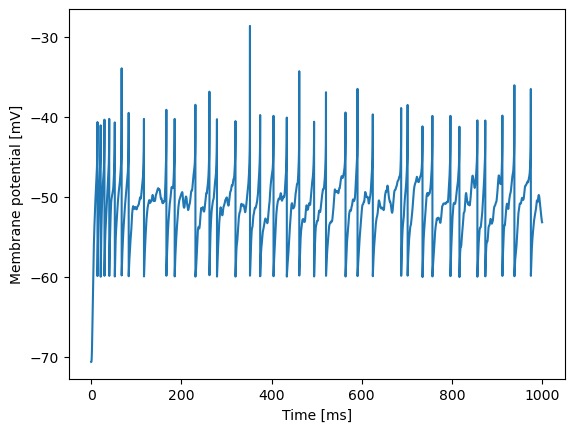

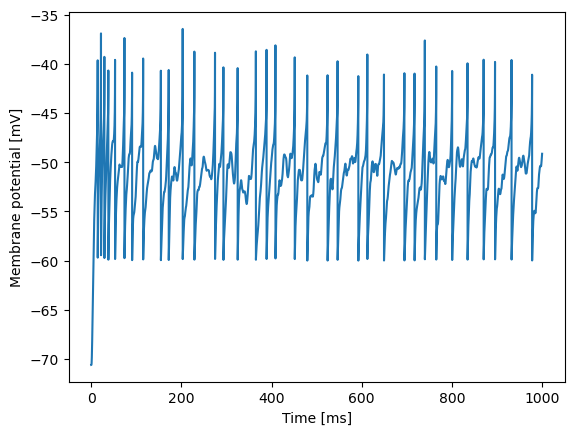

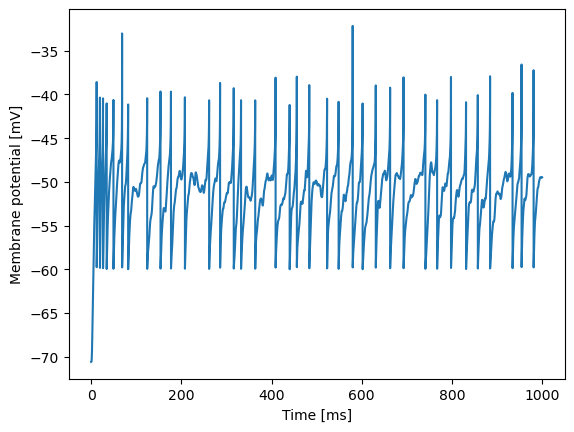

In [10]:
ngpu.ActivateRecSpikeTimes(neuron, 10000)

simulation_time=1000
ngpu.Simulate(sim_time=simulation_time)
spike_times=ngpu.GetRecSpikeTimes(neuron)
print(len(spike_times))
nrows=ngpu.GetRecordDataRows(record)
ncol=ngpu.GetRecordDataColumns(record)

data_list = ngpu.GetRecordData(record)
t=[row[0] for row in data_list]
V1=[row[1] for row in data_list]
V2=[row[2] for row in data_list]
V3=[row[3] for row in data_list]

import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(t, V1)
plt.xlabel('Time [ms]')
plt.ylabel('Membrane potential [mV]')

plt.figure(2)
plt.plot(t, V2)
plt.xlabel('Time [ms]')
plt.ylabel('Membrane potential [mV]')

plt.figure(3)
plt.plot(t, V3)
plt.xlabel('Time [ms]')
plt.ylabel('Membrane potential [mV]')
plt.draw()
plt.pause(0.5)
plt.close()



## Spike data analysis

Now we can start with the analysis of spikes coming from the two different populations. To analyse data we use [elephant](https://www.fz-juelich.de/en/ias/ias-6/leistungen/elephant). 

Elephant (Electrophysiology Analysis Toolkit) is an open-source, community centered library for the analysis of electrophysiological data in the Python programming language. The focus of Elephant is on generic analysis functions for spike train data and time series recordings from electrodes, such as the local field potentials (LFP) or intracellular voltages. 


Let's start importing all the necessary functions.

In [11]:
import elephant
from elephant.statistics import isi, cv
from elephant.conversion import BinnedSpikeTrain
from neo.core import SpikeTrain
from quantities import s
from elephant.spike_train_correlation import corrcoef
import numpy as np
import pandas as pd
import seaborn as sns
os.environ["HWLOC_HIDE_ERRORS"] = "0"

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


Before using specialized Elephant functions, we can first obtain a rough estimate of the firing rates of the two populations by simply analyzing the recorded spike data.  
`spike_times` is a list of lists in Python, meaning it is a data structure where each element of the main list is itself a list. 

spike_times[0]=[1,2,3,...] are the spike times of the first recorded neuron, and so on.

In [12]:
e_count= 0
i_count=0
e_bound= NE         # number of excitatory neurons
i_bound= NE + NI    # total number of neurons
for i_neur in range(i_bound):
    spikes = spike_times[i_neur]    # spike times of the i_neur‑th neuron
    if len(spikes) != 0:
        if i_neur < e_bound:
            for t in spikes:
                e_count += 1 #counts ex. spikes 
        else:
            for t in spikes:
                i_count += 1 #counts in. spikes 

print(f"This is the firing rate for excitatory population: {(1. * e_count / (4*order * simulation_time) * 1e3):.2f} Hz")
print(f"This is the firing rate for inhibitory population: {(1. * i_count / (order * simulation_time) * 1e3):.2f} Hz")


This is the firing rate for excitatory population: 35.29 Hz
This is the firing rate for inhibitory population: 35.26 Hz


Let's start with a raster plot of a subset of inhibitory and excitatory neurons. We have clearly an asyncronous state.

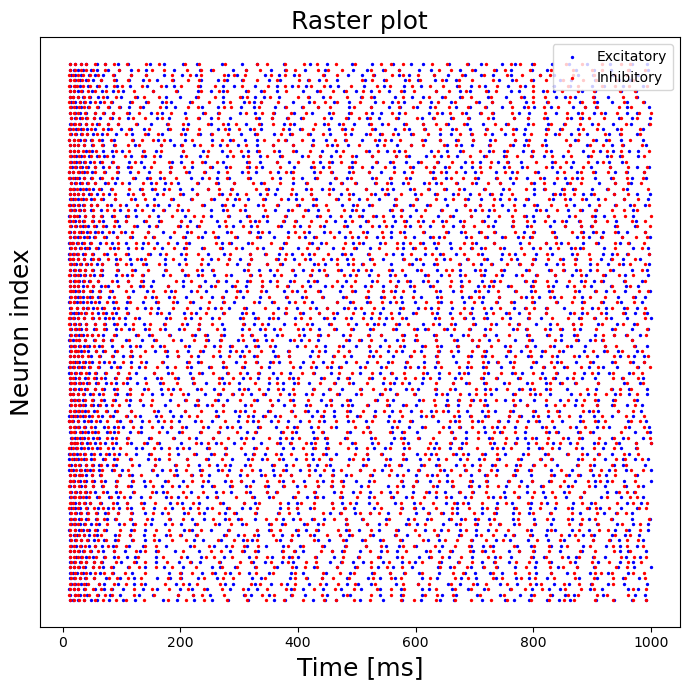

In [13]:
#### RASTER PLOT ####

fs = 18  # Font size
pct_to_plot_in = 0.1        # in. neurons percentage to plot
pct_to_plot_ex = 0.025  # ex. neurons percentage to plot
marker_size = 2

# split ex. and in. data
data_ex = spike_times[:NE]
data_in = spike_times[NE:NE+NI]


N_ex = len(data_ex)
N_in = len(data_in)
num_ex = max(1, int(N_ex * pct_to_plot_ex))
num_in = max(1, int(N_in * pct_to_plot_in))
neurons_ex = np.random.choice(N_ex, size=num_ex, replace=False)
neurons_in = np.random.choice(N_in, size=num_in, replace=False)

plt.figure(figsize=(7, 7))

for local_idx, neuron_id in enumerate(neurons_ex):
    spikes = data_ex[neuron_id]
    if spikes:
        plt.scatter(spikes, [local_idx]*len(spikes), s=marker_size, color='blue', label='Excitatory' if local_idx == 0 else "")

for local_idx, neuron_id in enumerate(neurons_in):
    spikes = data_in[neuron_id]
    if spikes:
        plt.scatter(spikes, [local_idx]*len(spikes), s=marker_size, color='red', label='Inhibitory' if local_idx == 0 else "")

# Etichette
plt.xlabel('Time [ms]', fontsize=fs)
plt.ylabel('Neuron index', fontsize=fs)
plt.title(f'Raster plot', fontsize=fs)
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.show()





**FIRING RATE DISTRIBUTION**


We can analyze the firing rate distribution of the two neuron populations and compare them using a violin plot. To compute the firing rates, we can use the function `elephant.statistics.mean_firing`, which calculates the firing rate from a spike train (i.e., a list of spike times).

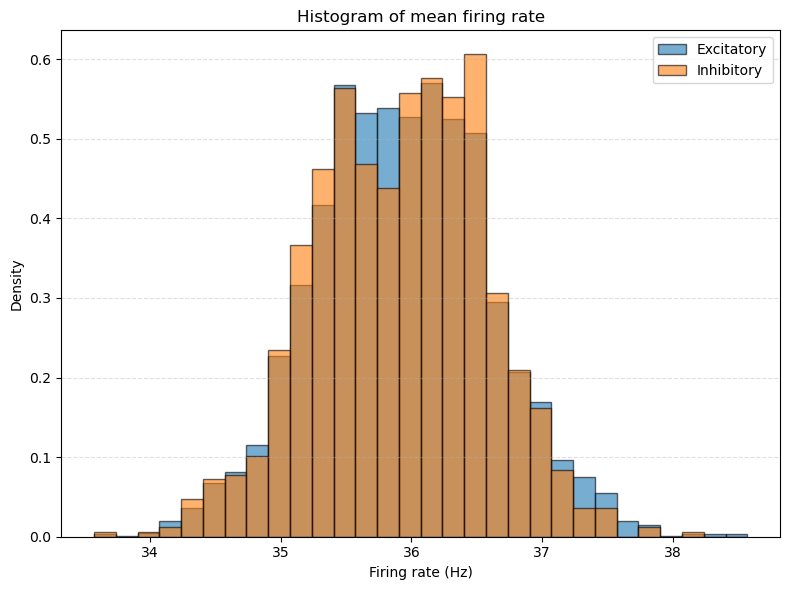

In [14]:
begin = 0
end = 1000  # ms = 1 s


# elephant.statistics.mean_firing rate compute the firing rate starting from a spike train
dist_ex = [1000*elephant.statistics.mean_firing_rate(data_ex[i])  for i in range(NE)]
dist_in = [1000*elephant.statistics.mean_firing_rate(data_in[i]) for i in range(NI)]

min_val = min(np.min(dist_ex), np.min(dist_in))
max_val = max(np.max(dist_ex), np.max(dist_in))

bins = np.linspace(min_val, max_val, 31)  

color_ex = '#1f77b4'
color_in = '#ff7f0e'

plt.figure(figsize=(8, 6))

plt.hist(dist_ex, bins=bins, density=True, alpha=0.6, label='Excitatory', color=color_ex, edgecolor='black')
plt.hist(dist_in, bins=bins, density=True, alpha=0.6, label='Inhibitory', color=color_in, edgecolor='black')

plt.title('Histogram of mean firing rate')
plt.xlabel('Firing rate (Hz)')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

**CV ISI PLOT**


Now we can plot the CV ISI (Coefficient of variation of interspike intervals ) distibutions to have some information about the spike train patterns. High values of CV ISI correspond to irregular or highly variable spike timing, indicating more bursty or random firing patterns. Conversely, low values of CV ISI indicate more regular and periodic spike trains, reflecting consistent firing intervals.

The coefficient of variation of the inter-spike intervals (i.e., **CV ISI**) is defined as the ratio between the standard deviation and the average of the inter-spike intervals:

$$
\mathrm{CV}_i = \frac{\sqrt{\sum_k \left( \text{ISI}^{(i)}_k - \langle \text{ISI}^{(i)}_k \rangle \right)^2}}{\sum_k \text{ISI}^{(i)}_k}
\tag{4.5}
$$

Given a spike train, the inter-spike interval (ISI) is defined as the time difference between two consecutive spikes. Thus:

$$ \text{ISI}_i(t) = t^{(i)}_{k+1} - t^{(i)}_k $$
Like the firing rate, this is a quantity extracted from a single neuron. Therefore, the **population distribution** is the collection of all $\mathrm{CV}_i$ values computed for each neuron in the population.

Using the Elephant library, we first compute the interspike intervals (ISI) with the `isi` function. Then, by applying the `cv` function to these ISI values, we calculate the coefficient of variation (CV) of the ISI distribution.


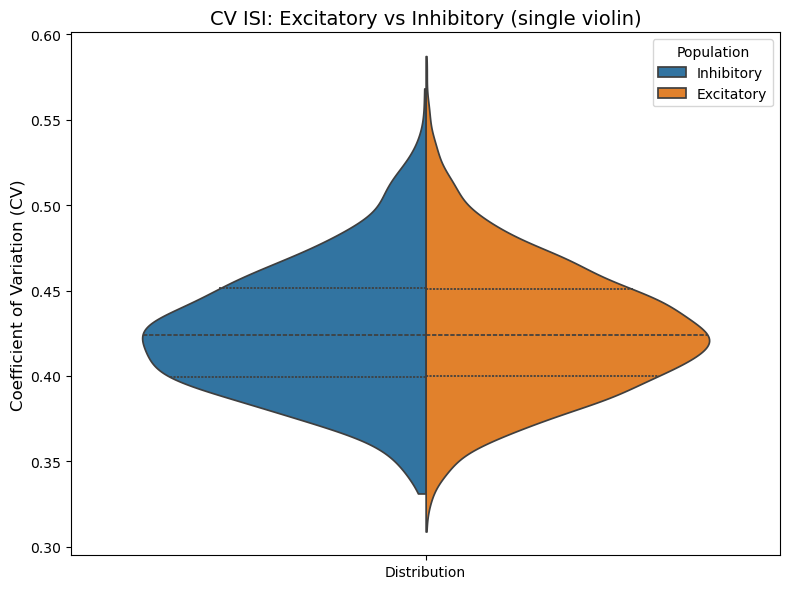

In [15]:
#plot CV ISI
dist_cvisi=[]

cvisi_in = [cv(isi(st_row)) for st_row in data_in if len(st_row) > 1]
cvisi_ex = [cv(isi(st_row)) for st_row in data_ex if len(st_row) > 1]

df = pd.DataFrame({
    'CV': np.concatenate([cvisi_in, cvisi_ex]),
    'Population': ['Inhibitory'] * len(cvisi_in) + ['Excitatory'] * len(cvisi_ex),
    'Group': ['Distribution'] * (len(cvisi_in) + len(cvisi_ex))  
})

plt.figure(figsize=(8,6))
sns.violinplot(x='Group', y='CV', hue='Population', data=df, split=True, inner="quartile", bw_method="silverman", gridsize=300, cut=0)
plt.title('CV ISI: Excitatory vs Inhibitory (single violin)', fontsize=14)
plt.ylabel('Coefficient of Variation (CV)', fontsize=12)
plt.xlabel('')
plt.legend(title='Population')
plt.tight_layout()
plt.show()

**CORRELATION PLOT**

To compute the Pearson correlation coefficient using Elephant, we first need to convert the spike data into `SpikeTrain` objects, and then into a `BinnedSpikeTrain`, which is a time-binned representation of the spike trains suitable for statistical analysis. We can perform this transformation for both the excitatory and inhibitory populations, and then compare the resulting correlation values using a violin plot.

To properly compute this statistical distribution, spike trains are binned using a time step of 2 ms (i.e., the neuron's refractory time used when simulating the network models), so that at most one spike can occur at each bin. We call **$b_i$** the binned spike train of the neuron *i* and **$\mu_i$** a vector with the same length of $b_i$ having all the entries equal to the average of the binned spike train.

Then, Pearson correlation can be computed as follows:

$$
C[i, j] = \frac{\langle b_i - \mu_i,\ b_j - \mu_j \rangle}{\sqrt{ \langle b_i - \mu_i,\ b_i - \mu_i \rangle \cdot \langle b_j - \mu_j,\ b_j - \mu_j \rangle }}
\tag{1}
$$

where $\langle \cdot,\ \cdot \rangle$ represents a scalar (dot) product.

Considering 200 neurons per population, the result of Equation 1 is a $200 \times 200$ matrix, and the distribution of the pairwise Pearson correlation is formed by the **non-diagonal** entries of the matrix.

We choose 200 neurons to compute the correlation matrix to have a reasonable computation time.

Computing correlation
[[0 2 1 ... 0 0 1]
 [0 1 2 ... 0 1 0]
 [0 2 1 ... 1 0 0]
 ...
 [0 2 1 ... 0 1 0]
 [0 1 1 ... 0 0 0]
 [0 2 1 ... 0 0 0]]


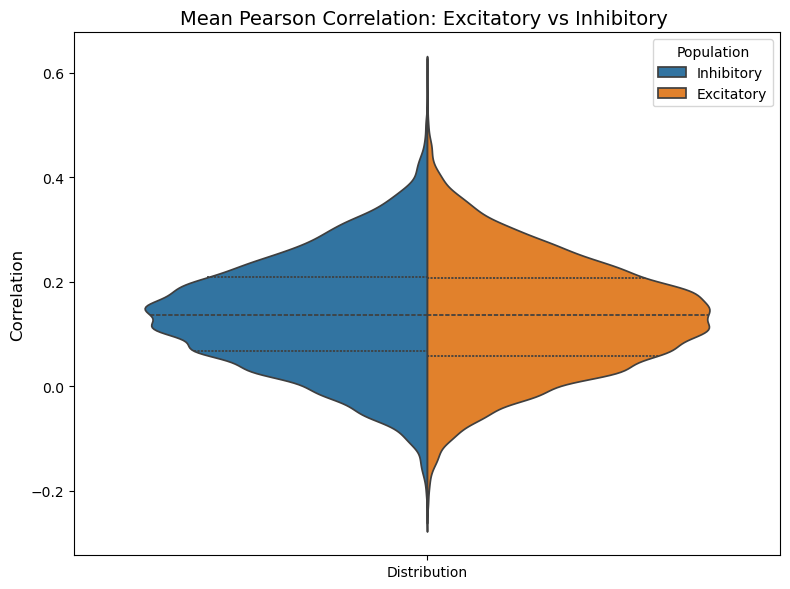

In [16]:

print("Computing correlation", flush=True)
st_list_ex = []
dist_corr_ex= []
st_list_in = []
dist_corr_in= []
matrix_size = 200
spike_time_bin = 0.01

begin=0
end=1000.0



# computing correlatin matrix for excitatory neurons
for j in range(matrix_size):
    spike_train = SpikeTrain(np.array(data_ex[j])/1000*s,t_stop=1*s)
    st_list_ex.append(spike_train)

binned_st = BinnedSpikeTrain(st_list_ex, spike_time_bin*s, tolerance=None)
print(binned_st.to_array())

cc_matrix = corrcoef(binned_st)
for j in range(matrix_size):
    for k in range(matrix_size):
            if (j != k and not np.isnan(cc_matrix[j][k])):
                dist_corr_ex.append(cc_matrix[j][k])




# computing correlatin matrix for inhibitory neurons

for j in range(matrix_size):
    spike_train = SpikeTrain(np.array(data_in[j])/1000*s,t_stop=1*s)
    st_list_in.append(spike_train)

binned_st = BinnedSpikeTrain(st_list_in, spike_time_bin*s, tolerance=None)

cc_matrix = corrcoef(binned_st)
for j in range(matrix_size):
    for k in range(matrix_size):
            if (j != k and not np.isnan(cc_matrix[j][k])):
                dist_corr_in.append(cc_matrix[j][k])



# plotting resulting distributions
                        
df = pd.DataFrame({
    'Correlation': np.concatenate([dist_corr_in, dist_corr_ex]),
    'Population': ['Inhibitory'] * len(dist_corr_in) + ['Excitatory'] * len(dist_corr_ex),
    'Group': ['Distribution'] * (len(dist_corr_in) + len(dist_corr_ex))  
})

plt.figure(figsize=(8,6))
sns.violinplot(x='Group', y='Correlation', hue='Population', data=df, split=True, inner="quartile", bw_method="silverman", gridsize=300)
plt.title('Mean Pearson Correlation: Excitatory vs Inhibitory ', fontsize=14)
plt.ylabel('Correlation', fontsize=12)
plt.xlabel('')
plt.legend(title='Population')
plt.tight_layout()
plt.show()

